<a href="https://colab.research.google.com/github/le-patrice/ANN/blob/main/tensorflow_basics_mnist_with_functional_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 0: Setup and Imports

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Step 1: Load & Preprocess Data

In [2]:
# Step 1: Load and preprocess Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Type formatting
x_train, x_test = x_train.astype("float32")/255.0, x_test.astype("float32")/255.0

# Normalize the data [0,1]
x_train, x_test = np.expand_dims(x_train, -1), np.expand_dims(x_test, -1)

print("Training shape:", x_train.shape, "Test shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training shape: (60000, 28, 28, 1) Test shape: (10000, 28, 28, 1)


### Step 2 Define Model (Functional API)

In [3]:
# Step 2: Define model using Functional API
inputs = tf.keras.Input(shape=(28, 28, 1), name="input_layer")

x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D((2,2))(x)

x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(.3)(x)

outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="MINST_Functional")
model.summary()

Model: "MINST_Functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### Step 3: Compile Model

In [4]:
# Step 3: Compiling Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

### Step 4: Train Model

In [6]:
# Step 4: Model Training
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=.1,
    verbose=2
)

Epoch 1/5
844/844 - 11s - 13ms/step - accuracy: 0.9350 - loss: 0.2124 - val_accuracy: 0.9822 - val_loss: 0.0576
Epoch 2/5
844/844 - 3s - 4ms/step - accuracy: 0.9796 - loss: 0.0667 - val_accuracy: 0.9888 - val_loss: 0.0397
Epoch 3/5
844/844 - 3s - 3ms/step - accuracy: 0.9856 - loss: 0.0473 - val_accuracy: 0.9892 - val_loss: 0.0388
Epoch 4/5
844/844 - 3s - 3ms/step - accuracy: 0.9887 - loss: 0.0364 - val_accuracy: 0.9903 - val_loss: 0.0336
Epoch 5/5
844/844 - 3s - 4ms/step - accuracy: 0.9897 - loss: 0.0321 - val_accuracy: 0.9903 - val_loss: 0.0356


### Step 5: Evaluate and Visualize

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9891 - loss: 0.0351
Test accuracy: 0.9904999732971191
Test loss: 0.028579095378518105


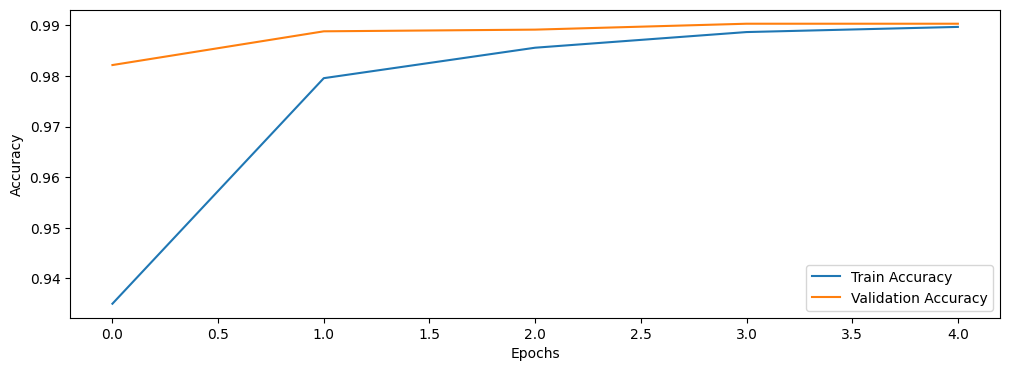

In [8]:
# Step 5: Evaluate Model
test_loss, test_acc = model.evaluate(x_test,y_test)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

# Plot the training history
plt.figure(figsize=(12,4))
plt.plot(history.history['accuracy'],label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Step 6: Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 839ms/step


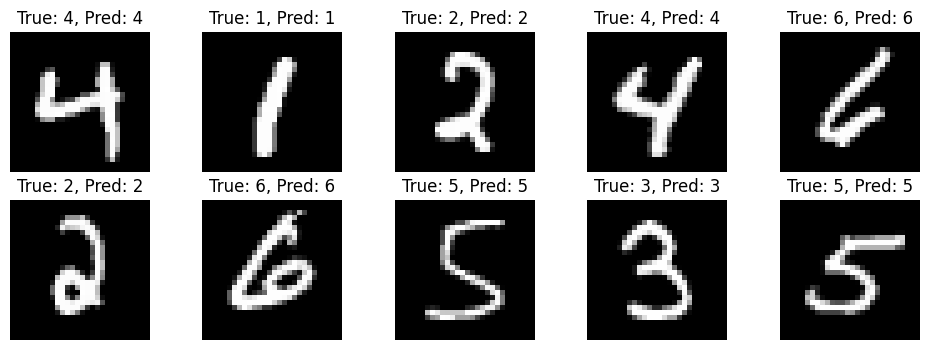

In [9]:
# Step 6: Predictions
idx = np.random.choice(len(x_test),10)
sample_images = x_test[idx]
sample_labels = y_test[idx]

pred_probs = model.predict(sample_images)
pred_labels = np.argmax(pred_probs, axis=1)

# Plotting
plt.figure(figsize=(12, 4))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(sample_images[i].reshape(28,28),cmap="gray")
  plt.title(f"True: {sample_labels[i]}, Pred: {pred_labels[i]}")
  plt.axis("off")

plt.show()
